<a href="https://colab.research.google.com/github/not-rudy/Applied-Experimental-Statistics/blob/main/NASA_Airfoil_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

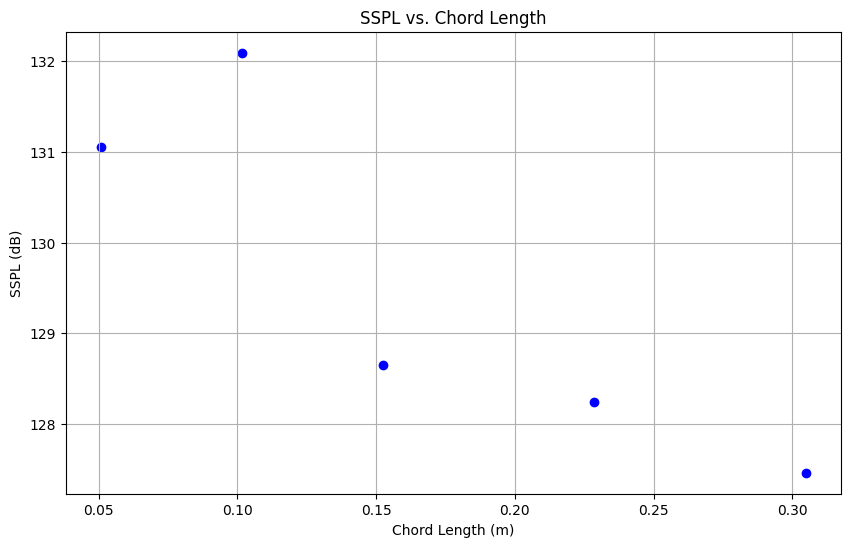

In [21]:
## MAE 301: Applied Experimental Statistics - Final Project: NASA Airfoil Self-Noise
# Members: Rudy Medrano, Justin Moralas, Omar Elaqad

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

## Load Data
data = pd.read_csv("/AirfoilSelfNoise.csv")

## Establish Variables
Frequency = data['f'] # Frequency, in Hertz [Hz]
alpha = data['alpha'] # Angle of attack, in degrees [deg]
chord = data['c'] # Chord Length, in meters [m]
FreeStream = data['U_infinity'] # Free Stream Velocity, in meters per second [m/s
delta = data['delta'] # Suction Side Displacement Thickness, in meters [m]
SSPL = data['SSPL'] # Scaled Sound Pressure Level, in decibels [dB]

## Experiment 1: SSPL as a function of Chord Length

# Establish Target Values
target_freq = 2000 # Target frequency, in Hertz [Hz]
target_alpha = 0 # Target angle of attack, in degrees [deg]
target_FreeStream = 71.3 # Target Free Stream Velocity, in meters per second [m/s]

# Create the Constraints for the Chord Length Experiment
chord_constraint = (Frequency == target_freq) & (alpha == target_alpha) & (FreeStream == target_FreeStream)

# Filter the Data
chord_filtered = data.loc[chord_constraint, 'c']
SSPL_filtered = data.loc[chord_constraint, 'SSPL']

# Plotting SSPL as a function of Chord Length
plt.figure(figsize=(10, 6))
plt.scatter(chord_filtered, SSPL_filtered, color='blue', label='')
plt.title('SSPL vs. Chord Length')
plt.xlabel('Chord Length (m)')
plt.ylabel('SSPL (dB)')
plt.grid(True)

plt.show()



